# MNIST Data Set 
## About the Dataset
* The MNIST dataset contains 60,000 training cases and 10,000 test cases of handwritten digits (0 to 9)
* Each digit is normalized and centered in a gray-scale (0 - 255) image with size 28 × 28



## Importing Libraries

In [138]:
import keras
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [139]:
batchsize = 512
total_classes = 10
epochs = 10

## Loading Data

In [140]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

##Data Preparation

In [141]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [142]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [143]:
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [144]:
Y_train = keras.utils.to_categorical(Y_train, total_classes)
Y_test = keras.utils.to_categorical(Y_test, total_classes)

In [145]:
print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


##Model Definition

In [146]:
initial = keras.Input(shape=(28, 28, 1))
X = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(initial)
X = layers.MaxPooling2D(pool_size=(2, 2))(X)
X = layers.Dropout(0.25)(X, training=True)
X = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(X)
X = layers.MaxPooling2D(pool_size=(2, 2))(X)
X = layers.Dropout(0.5)(X, training=True)
X = layers.Flatten()(X)
Final = layers.Dense(total_classes, activation="softmax")(X)
model = keras.Model(inputs=initial, outputs=Final)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 7, 7, 64)          0  

## Model training

In [147]:
history = model.fit(X_train, Y_train, batch_size = batchsize, epochs= 10, validation_split=0.1, shuffle=True)

Epoch 1/10
106/106 [==============================] - 58s 540ms/step - loss: 0.7150 - accuracy: 0.7768 - val_loss: 0.2196 - val_accuracy: 0.9337
Epoch 2/10
106/106 [==============================] - 57s 535ms/step - loss: 0.2092 - accuracy: 0.9370 - val_loss: 0.1348 - val_accuracy: 0.9628
Epoch 3/10
106/106 [==============================] - 56s 533ms/step - loss: 0.1425 - accuracy: 0.9566 - val_loss: 0.1051 - val_accuracy: 0.9717
Epoch 4/10
106/106 [==============================] - 56s 531ms/step - loss: 0.1177 - accuracy: 0.9639 - val_loss: 0.0925 - val_accuracy: 0.9712
Epoch 5/10
106/106 [==============================] - 56s 532ms/step - loss: 0.1012 - accuracy: 0.9688 - val_loss: 0.0801 - val_accuracy: 0.9773
Epoch 6/10
106/106 [==============================] - 56s 532ms/step - loss: 0.0905 - accuracy: 0.9720 - val_loss: 0.0749 - val_accuracy: 0.9777
Epoch 7/10
106/106 [==============================] - 57s 535ms/step - loss: 0.0831 - accuracy: 0.9738 - val_loss: 0.0692 - val_ac

In [148]:
Performance = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: ", Performance[1])
print("Test Loss: ", Performance[0])

Test Accuracy:  0.98089998960495
Test Loss:  0.05828424543142319


# **Explainable AI with Shapley values**


<br>
<br>

### Shapley values are a widely used approach from cooperative game theory that come with desirable properties. This tutorial is designed to help build a basic understanding of how to compute and interpet Shapley-based explanations on deep learning model using the shap Python package.

In [149]:
!pip install Shap

In [155]:
#set data samples for expectation
data = X_train[np.random.choice(X_train.shape[0], 50, replace=False)]

S1 = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), data)
#calculating SHAP Values
ShapValues = S1.shap_values(X_test[1:20],check_additivity=False)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


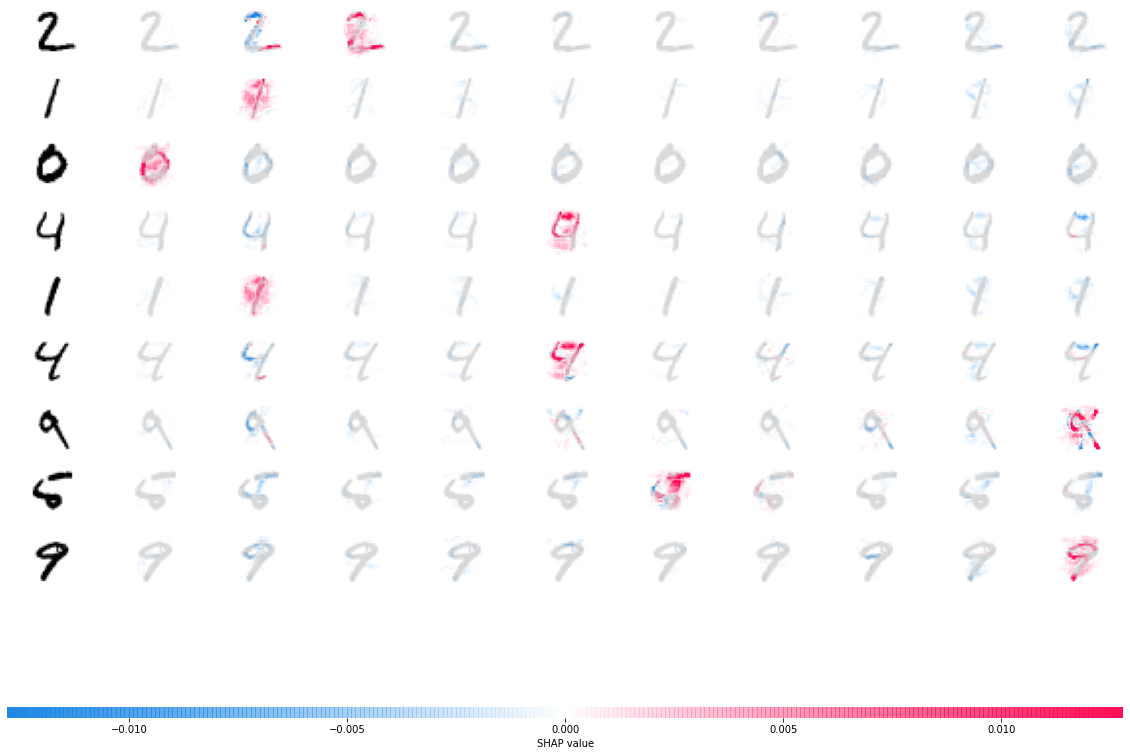

None

In [156]:
#Visualizing Feature importance
Plot = shap.image_plot(ShapValues, -X_test[1:10])
display(Plot)

The plot above demonstrates predictions for 9 images; 2,1,0,4,1,4,9,5,4. 
* The Prediction trend is from left to right
* Red pixels refer to an improvement in output
* Blue pixels refer to a reduction in output

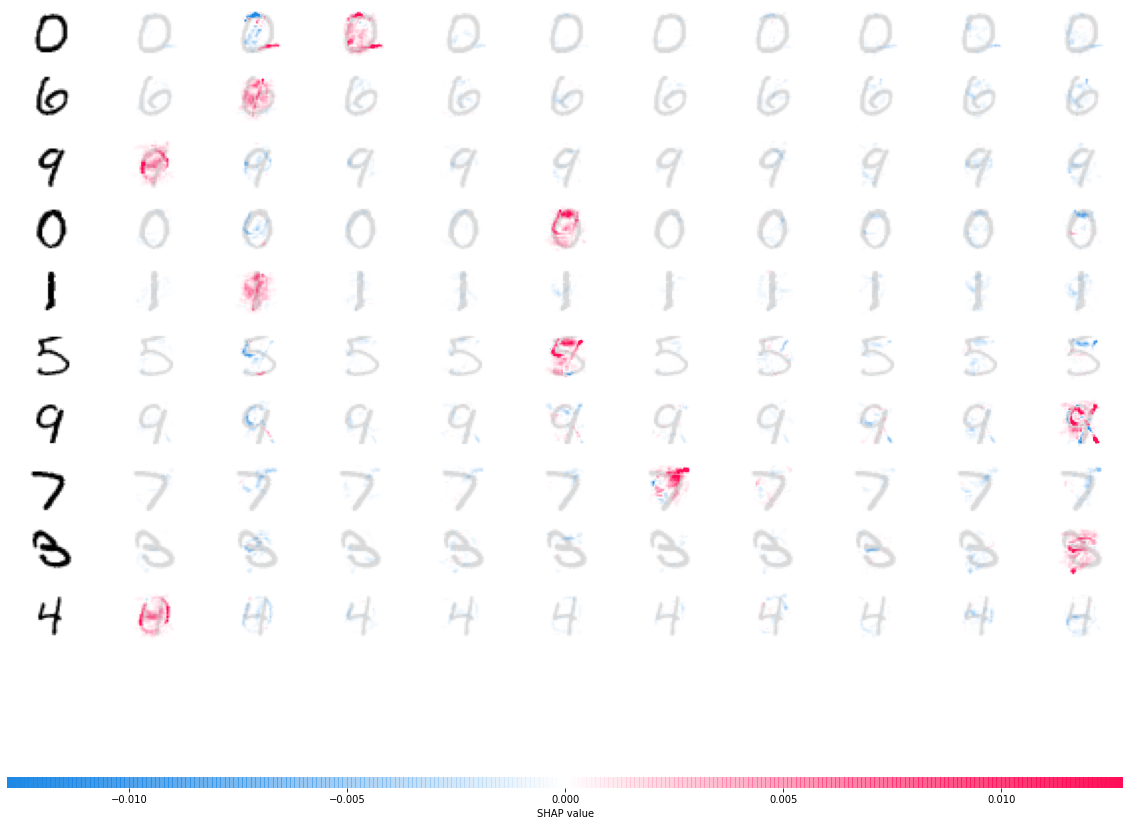

None

In [157]:
Plot = shap.image_plot(ShapValues, -X_test[10:20])
display(Plot)

# **References**
* https://towardsdatascience.com/pytorch-shap-explainable-convolutional-neural-networks-ece5f04c374f
*https://www.python-course.eu/neural_network_mnist.php
*https://christophm.github.io/interpretable-ml-book/shapley.html